# Projeto 5: Classificação de Texto e Análise de Sentimentos

- Base de dados: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.14.0'

# Etapa 2: Importação da base de dados

In [ ]:
df_alexa = pd.read_csv("/content/amazon-alexa.tsv", sep='\t')

In [ ]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Etapa 3: Visualização dos dados

In [ ]:
positive = df_alexa[df_alexa['feedback'] == 1]

In [ ]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
negative = df_alexa[df_alexa['feedback'] == 0]

In [ ]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


<Axes: ylabel='count'>

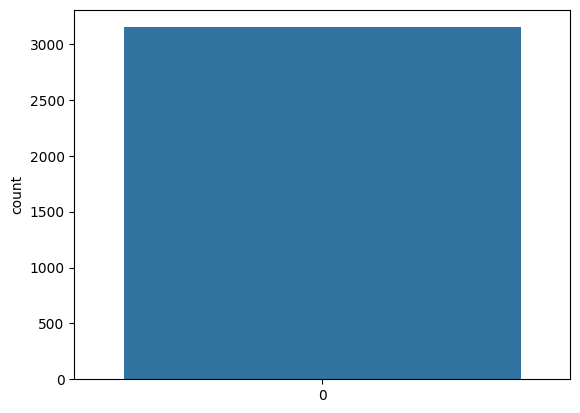

In [ ]:
sns.countplot(df_alexa['feedback'], label= 'Count')

<Axes: xlabel='rating', ylabel='count'>

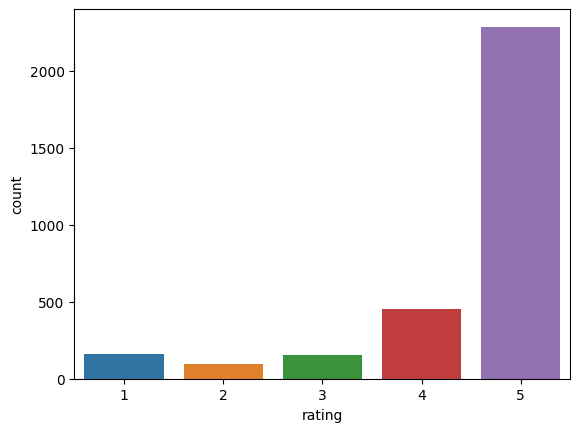

In [ ]:
sns.countplot(x = 'rating', data = df_alexa)

<Axes: >

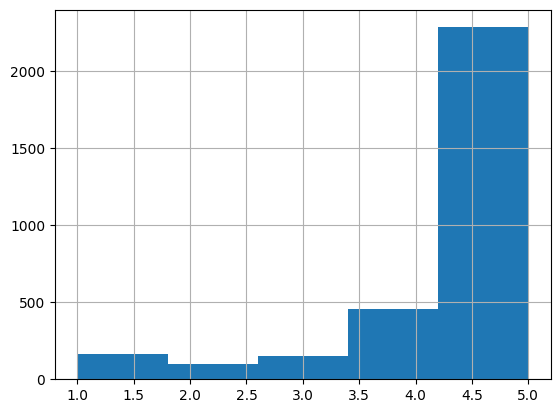

In [ ]:
df_alexa['rating'].hist(bins = 5)

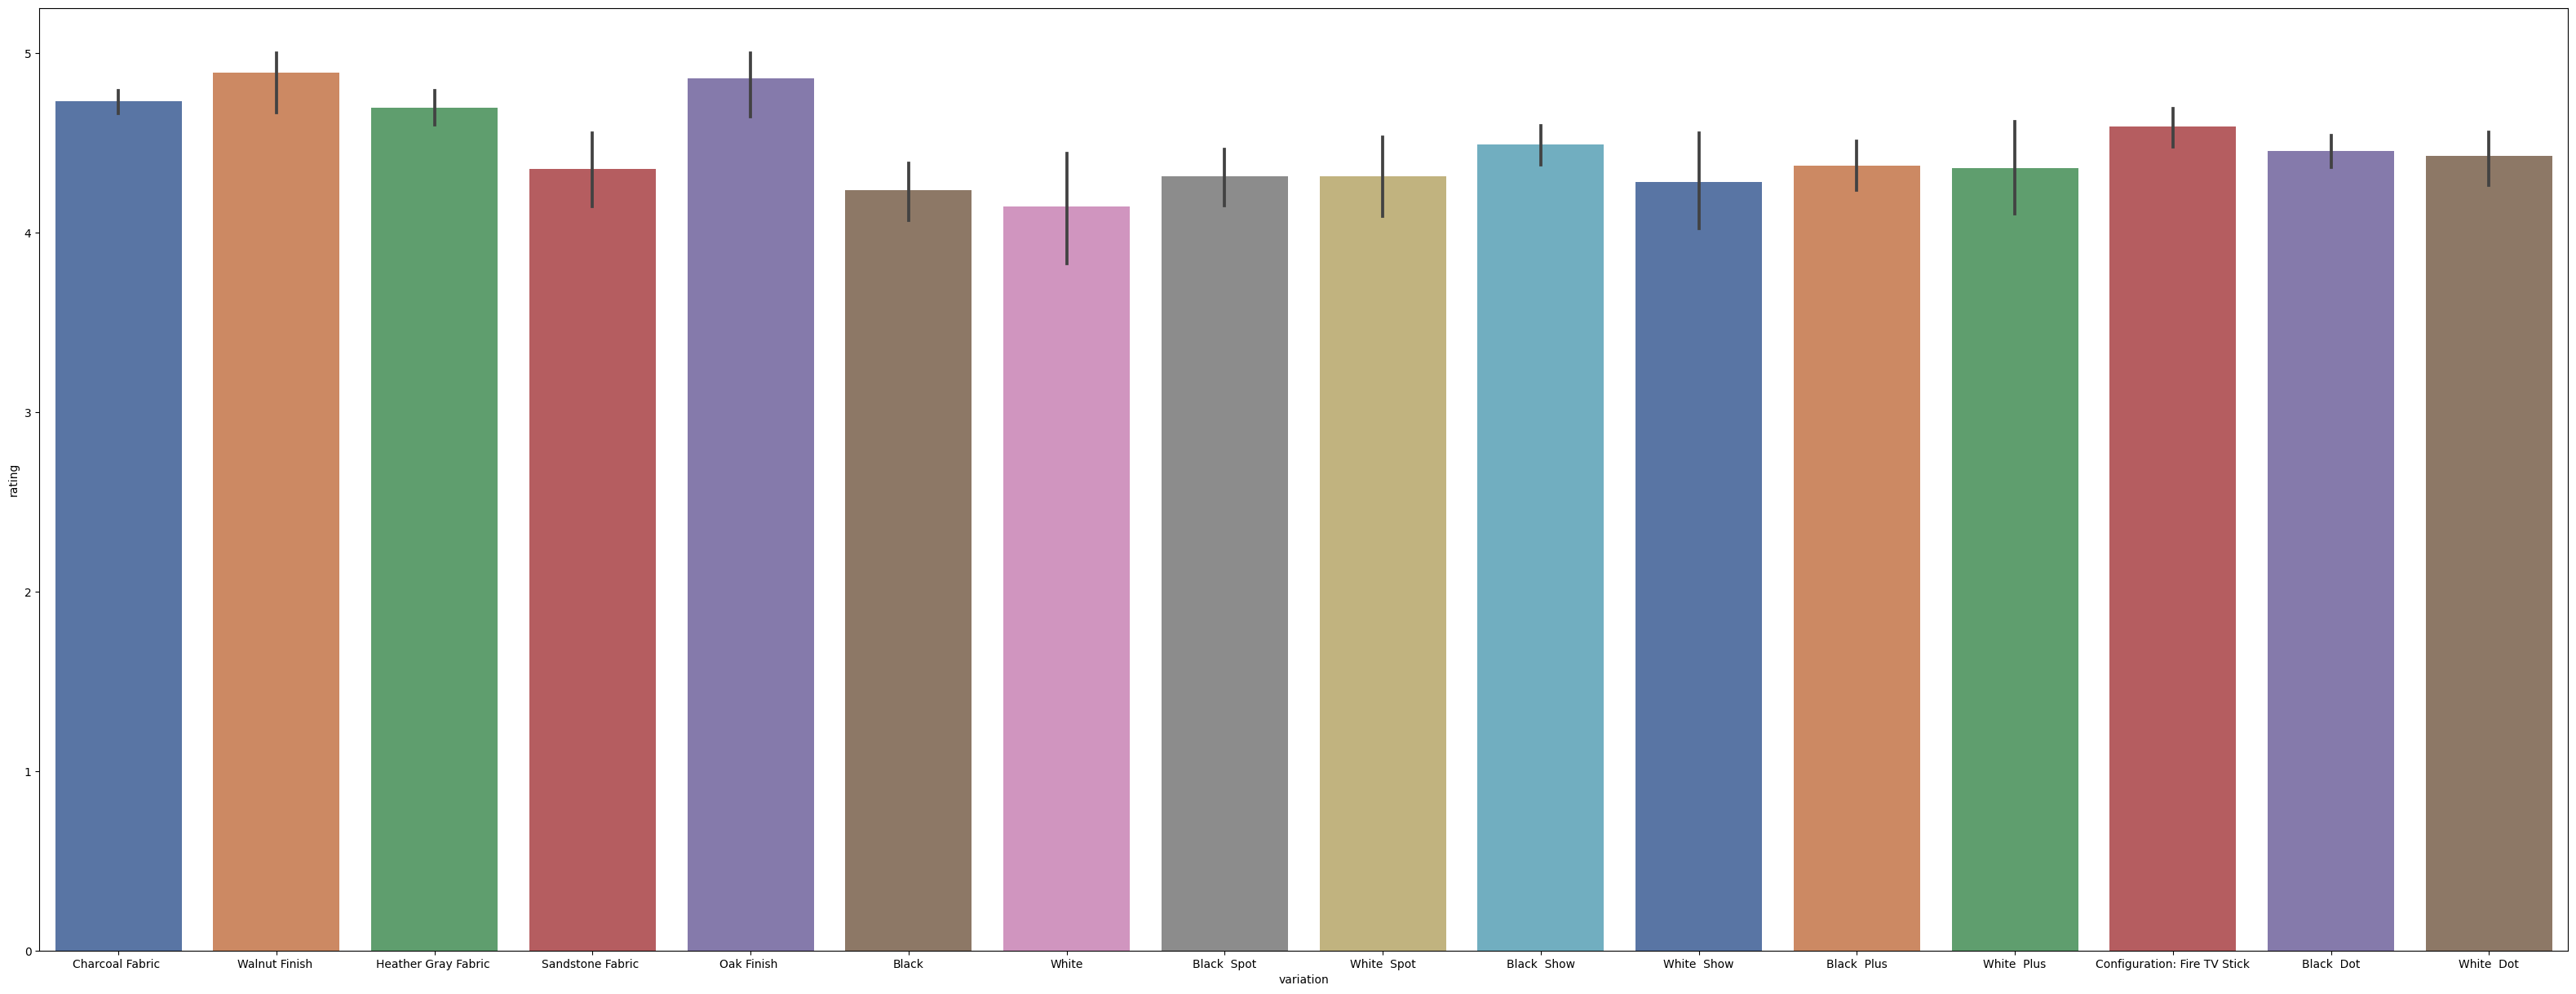

In [ ]:
plt.figure(figsize= (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');

# Etapa 4: Limpeza dos dados

In [ ]:
df_alexa = df_alexa.drop(["date", "rating"], axis = 1)

In [ ]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [ ]:
variation_dummies = pd.get_dummies(df_alexa['variation'])

In [ ]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_alexa.drop(['variation'], axis = 1, inplace= True)

In [ ]:
df_alexa.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)

In [ ]:
df_alexa.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Exemplo de tokenização


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data = ['This is the first document.',
               'This document is the second document.',
               'and this is third one.',
               'Is this the first document?']

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
print(x.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 0 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Tokenização da base de dados

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [ ]:
alexa_countvectorizer.shape

(3150, 4044)

In [ ]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [ ]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(alexa_countvectorizer.toarray()[1])

[0 0 0 ... 0 0 0]


In [ ]:
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True)

In [ ]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [ ]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

In [ ]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_alexa.drop('feedback', axis = 1)

In [ ]:
X.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_alexa['feedback']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
X_train.shape

(2520, 4060)

In [ ]:
X_test.shape

(630, 4060)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060,)))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               1624400   
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1785201 (6.81 MB)
Trainable params: 1785201 (6.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_hist = classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 3s 21ms/step - loss: 0.2715 - accuracy: 0.9183
Epoch 2/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0893 - accuracy: 0.9631
Epoch 3/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0314 - accuracy: 0.9913
Epoch 4/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0157 - accuracy: 0.9940
Epoch 7/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0154 - accuracy: 0.9944
Epoch 8/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0153 - accuracy: 0.9933
Epoch 9/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 10/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0149 - accuracy: 0.9937


# Etapa 6: Avaliação do modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_train

79/79 [==============================] - 0s 5ms/step


array([[1.        ],
       [0.99999976],
       [1.        ],
       ...,
       [1.        ],
       [0.9999496 ],
       [0.9999976 ]], dtype=float32)

In [ ]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 186,   12],
       [   1, 2321]])

<Axes: >

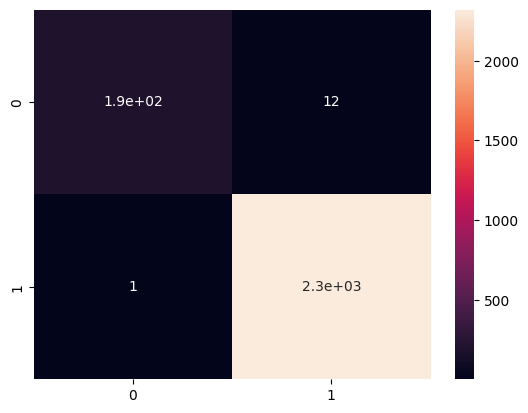

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
cm

20/20 [==============================] - 0s 10ms/step


array([[ 15,  44],
       [  4, 567]])

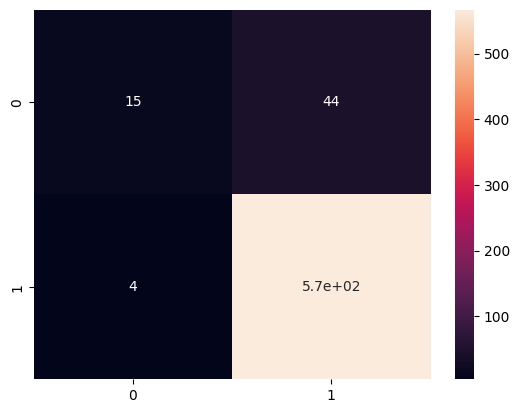

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

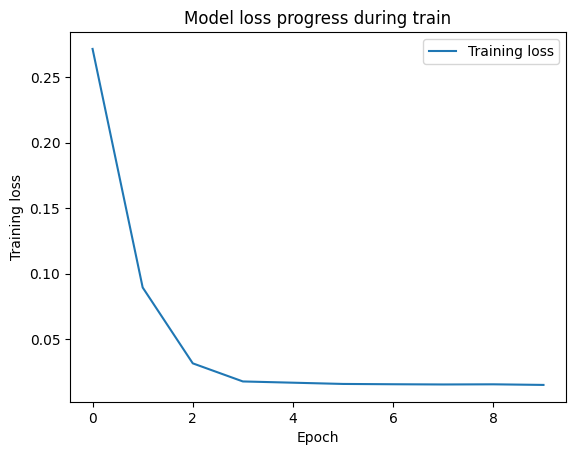

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during train')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

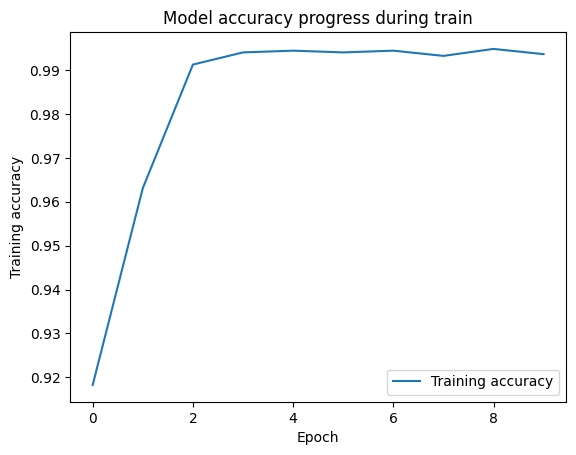

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during train')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])